**Load Dataset**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smmmmmmmm","key":"7b133f9532960b035175029dd9cafb37"}'}

In [1]:
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset
!unzip london-bike-sharing-dataset.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 43.6MB/s]
Archive:  london-bike-sharing-dataset.zip
  inflating: london_merged.csv       


In [4]:
data = pd.read_csv("london_merged.csv")

# Overview of the dataset
print("Dataset Info:")
data.info()

print("\nMissing Values:")
print(data.isnull().sum())

# Statistical summary of numerical features
print("\nStatistical Summary:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB

Missing Values:
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

Statistical Summary:
                cnt            t1            t2           hum    wi

**Exploratory Data Analysis**


---


Distribution of Total Bike Rentals

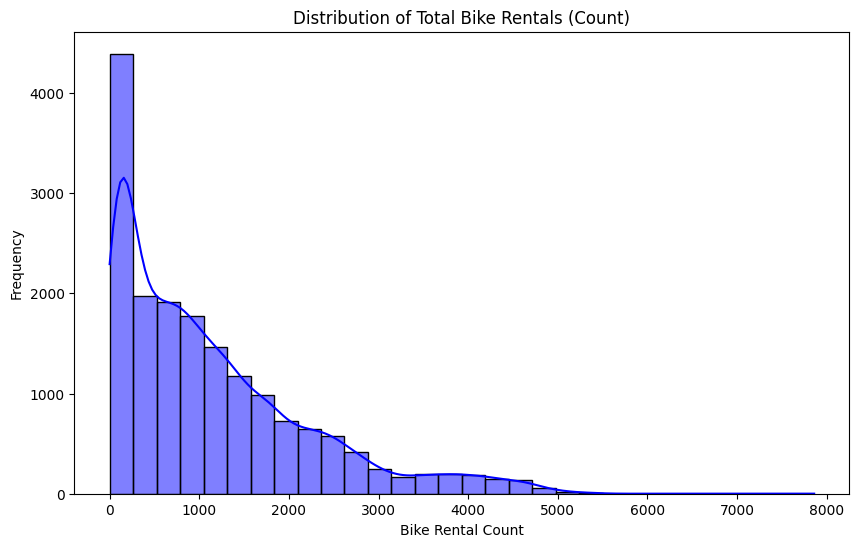

In [ ]:
# Distribution of the target variable 'count'
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], kde=True, bins=30, color='blue')
plt.title('Distribution of Total Bike Rentals (Count)')
plt.xlabel('Bike Rental Count')
plt.ylabel('Frequency')
plt.show()

Feature Correlation Heatmap

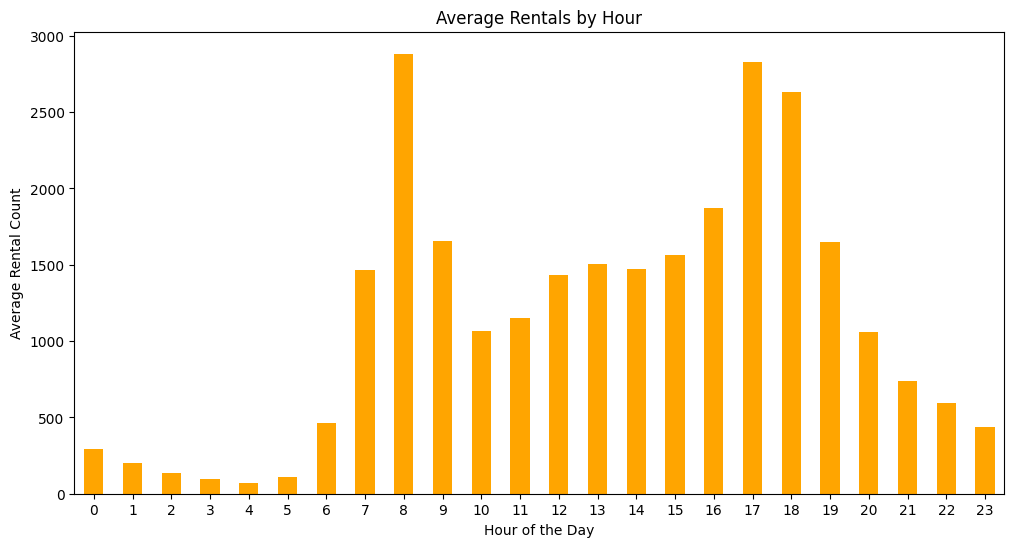

In [ ]:
# Convert datetime to a pandas datetime object
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# Bike rentals over time
plt.figure(figsize=(12, 6))
data.groupby('hour')['cnt'].mean().plot(kind='bar', color='orange')
plt.title('Average Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rental Count')
plt.xticks(rotation=0)
plt.show()

Seasonal Decomposition

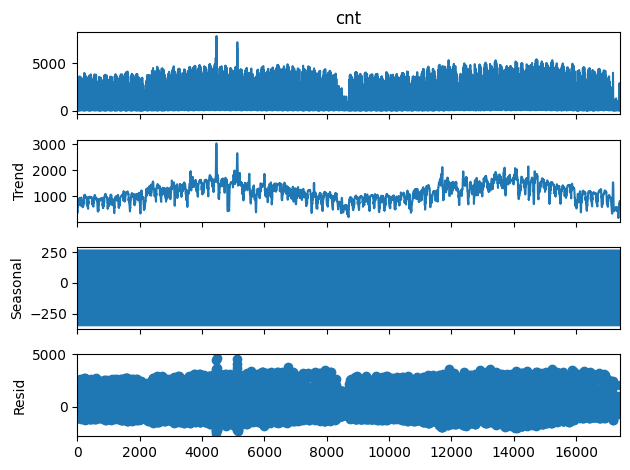

In [ ]:
# Seasonal Decomposition
decomposition = seasonal_decompose(data['cnt'], model='additive', period=24)
decomposition.plot()
plt.show()

Average Rentals by Season

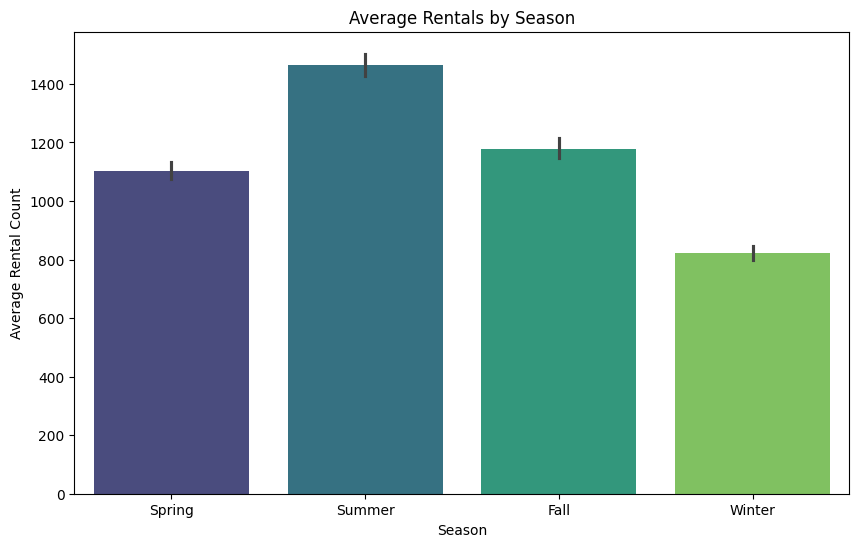

In [ ]:
# Rentals by season
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='season', y='cnt', palette='viridis')
plt.title('Average Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rental Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

Average Rentals by Weather Condition

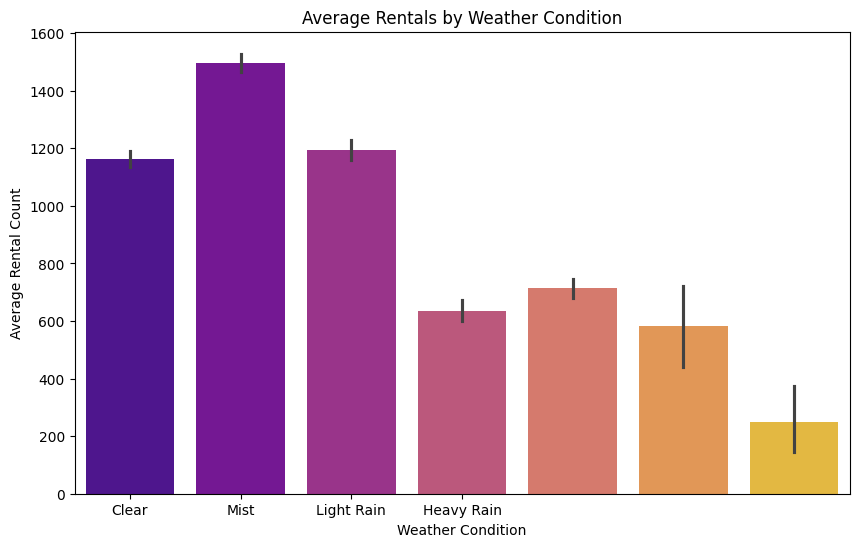

In [ ]:
# Rentals by weather condition
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='weather_code', y='cnt', palette='plasma')
plt.title('Average Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rental Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.show()

**Machine Learning Models**


---

Data Preprocessing

In [ ]:
# Drop irrelevant columns
data.drop(['timestamp'], axis=1, inplace=True)

# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['season', 'wind_speed'], drop_first=True)


In [11]:
# Define features and target variable
X = data.drop(['cnt'], axis=1)
y = data['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and Testing data split completed.")


Training and Testing data split completed.


Model Training


Linear Regression

Linear Regression Performance:
MAE: 698.6988015460896
RMSE: 945.6798796165218
R2 Score: 0.2536485047496695


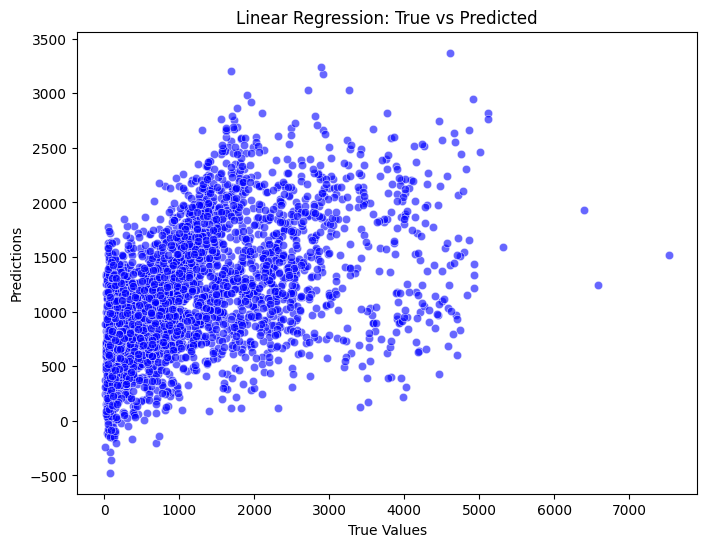

In [12]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

# Evaluate performance
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, lr_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lr_predictions))}")
print(f"R2 Score: {r2_score(y_test, lr_predictions)}")

# Scatter plot of predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_predictions, alpha=0.6, color='blue')
plt.title("Linear Regression: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


Random Forest Model with Hyperparameter Tuning

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   4.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   3.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   4.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   8.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   7.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  41.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  24.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  15.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   3.0s
[CV] END max_depth=None, min_samples_split=5, n_estimators=50; total time=   3.3s
[CV] END max_depth=None, min_sa

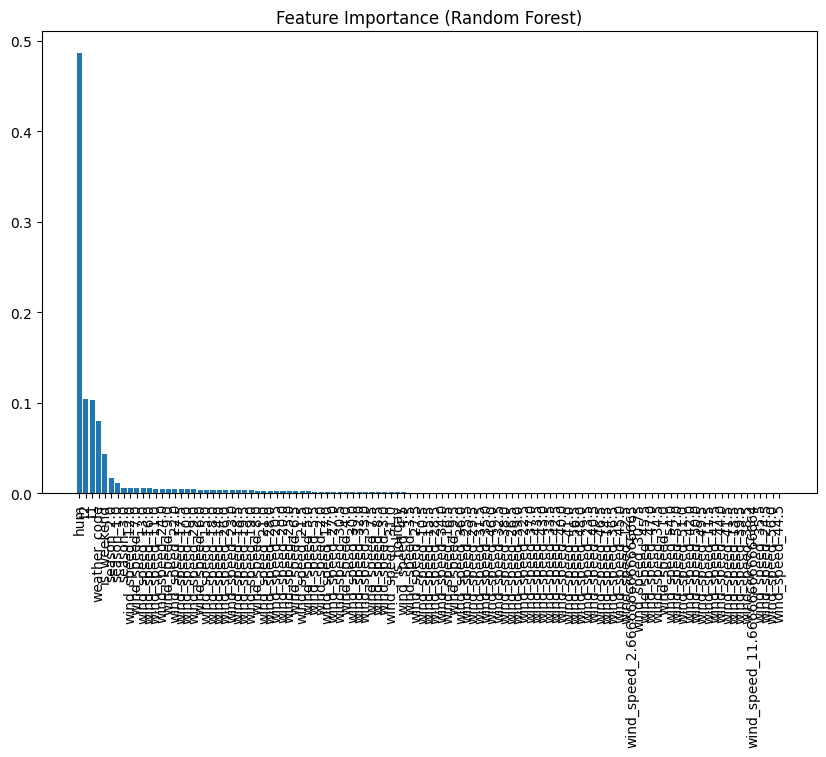

In [13]:
# Random Forest with GridSearchCV
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf, param_grid, cv=3, scoring='r2', verbose=2)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
rf_predictions = best_rf.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_predictions))}")
print(f"R2 Score: {r2_score(y_test, rf_predictions)}")

# Feature importance visualization
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()


Support Vector Regression

SVR Performance:
MAE: 633.083690360892
RMSE: 980.5917393982129
R2 Score: 0.19752489195216438


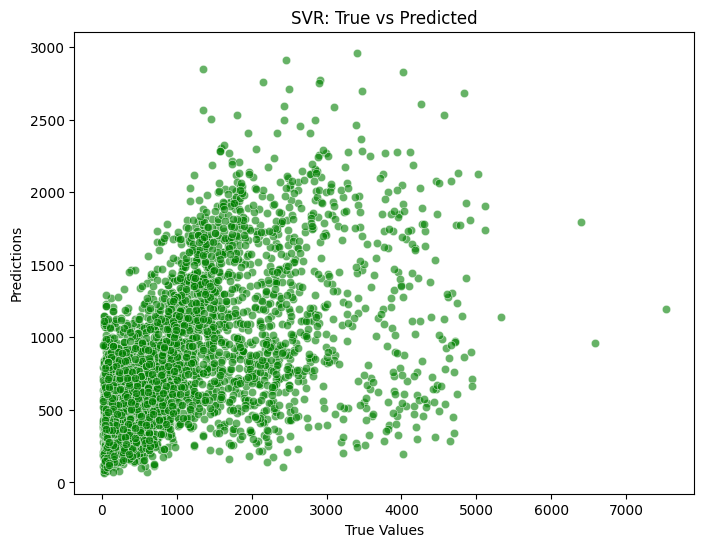

In [14]:
# Train an SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train)

# Predictions
svr_predictions = svr.predict(X_test)

# Evaluate performance
print("SVR Performance:")
print(f"MAE: {mean_absolute_error(y_test, svr_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, svr_predictions))}")
print(f"R2 Score: {r2_score(y_test, svr_predictions)}")

# Visualization of predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=svr_predictions, alpha=0.6, color='green')
plt.title("SVR: True vs Predicted")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


Based on the evaluations of the models:
- Linear Regression: Simplicity, but might underfit complex relationships.
- Random Forest: Likely the best-performing model due to its ability to capture non-linear patterns.
- SVR: May perform well but computationally expensive.

We'll proceed with the Random Forest model for forecasting.

**Forecasting**

Preparing Data

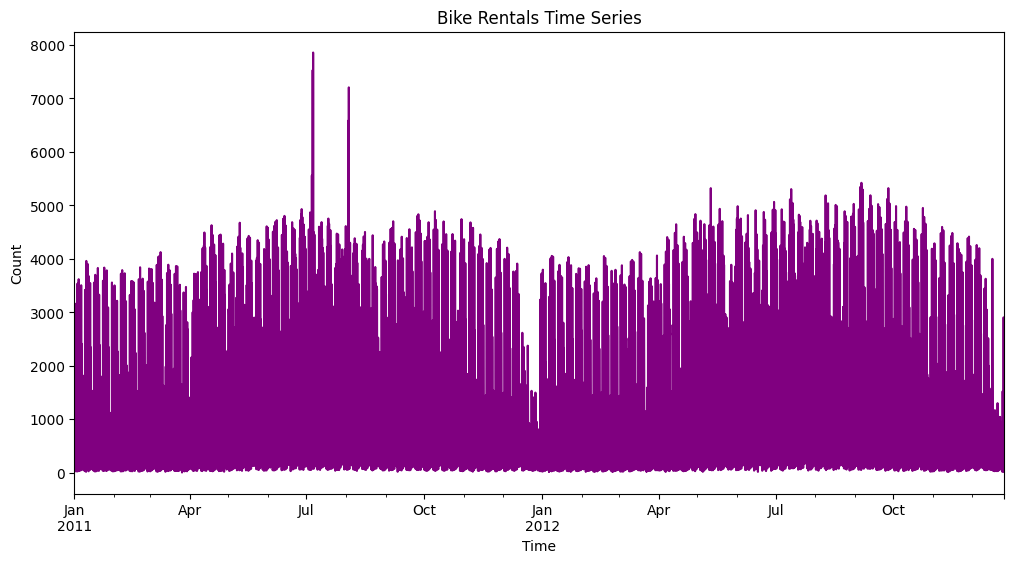

In [16]:
# Creating a time series of the count variable
time_series_data = data[['cnt']]
time_series_data.index = pd.date_range(start='2011-01-01', periods=len(time_series_data), freq='H')

# Plot the time series
plt.figure(figsize=(12, 6))
time_series_data['cnt'].plot(color='purple')
plt.title("Bike Rentals Time Series")
plt.xlabel("Time")
plt.ylabel("Count")
plt.show()


Time-Series

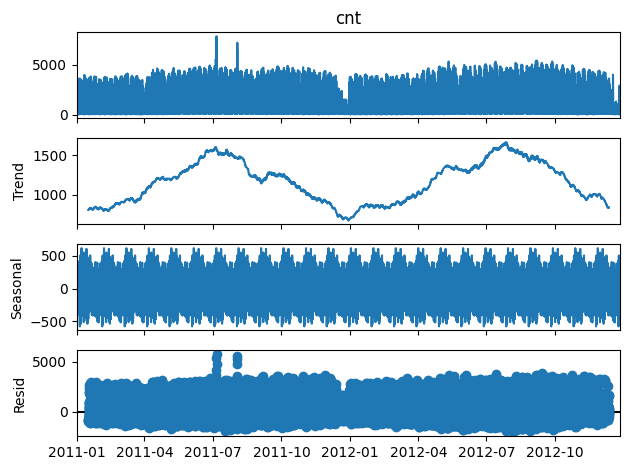

In [17]:
# Seasonal decomposition
decomposition = seasonal_decompose(time_series_data['cnt'], model='additive', period=24*30)
decomposition.plot()
plt.show()


Exponential Smoothing

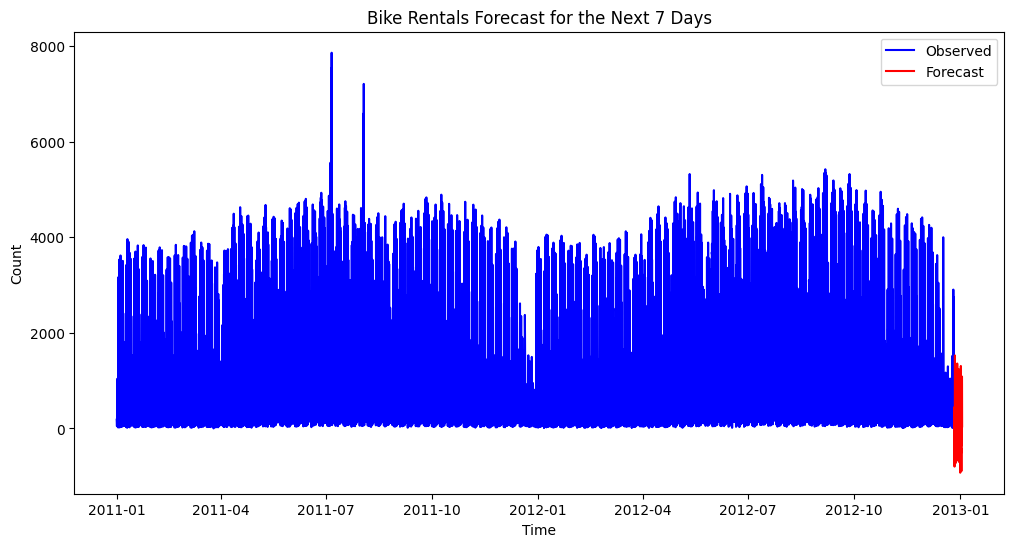

In [18]:
# Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(
    time_series_data['cnt'],
    seasonal='add',
    seasonal_periods=24*30,
    trend='add'
).fit()

# Forecast for the next 7 days
forecast = hw_model.forecast(steps=7*24)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['cnt'], label='Observed', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title("Bike Rentals Forecast for the Next 7 Days")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()


Forecast MAE: 1838.7687840942815
Forecast RMSE: 2206.1261898837147


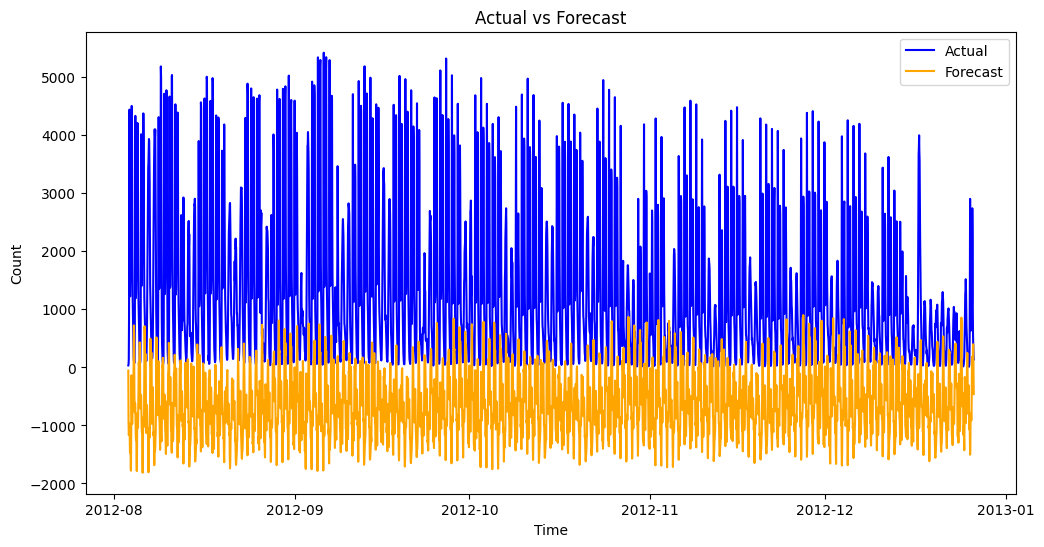

In [19]:
# Create a train-test split for the time series
train_size = int(len(time_series_data) * 0.8)
train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Train the model on train data
hw_model_train = ExponentialSmoothing(
    train_data['cnt'],
    seasonal='add',
    seasonal_periods=24*30,
    trend='add'
).fit()

# Forecast on test data
test_forecast = hw_model_train.forecast(steps=len(test_data))

# Evaluate forecast accuracy
mae = mean_absolute_error(test_data, test_forecast)
rmse = np.sqrt(mean_squared_error(test_data, test_forecast))
print(f"Forecast MAE: {mae}")
print(f"Forecast RMSE: {rmse}")

# Plot the actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual', color='blue')
plt.plot(test_forecast, label='Forecast', color='orange')
plt.title("Actual vs Forecast")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend()
plt.show()
